In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
f = fits.open("/Users/mhughes/google_drive/codedungeon/sun_selector/data/thm_files/set_10/OR_SUVI-L1b-Fe195_G16_s20170911037044_e20170911037054_c20170911037188.fits")

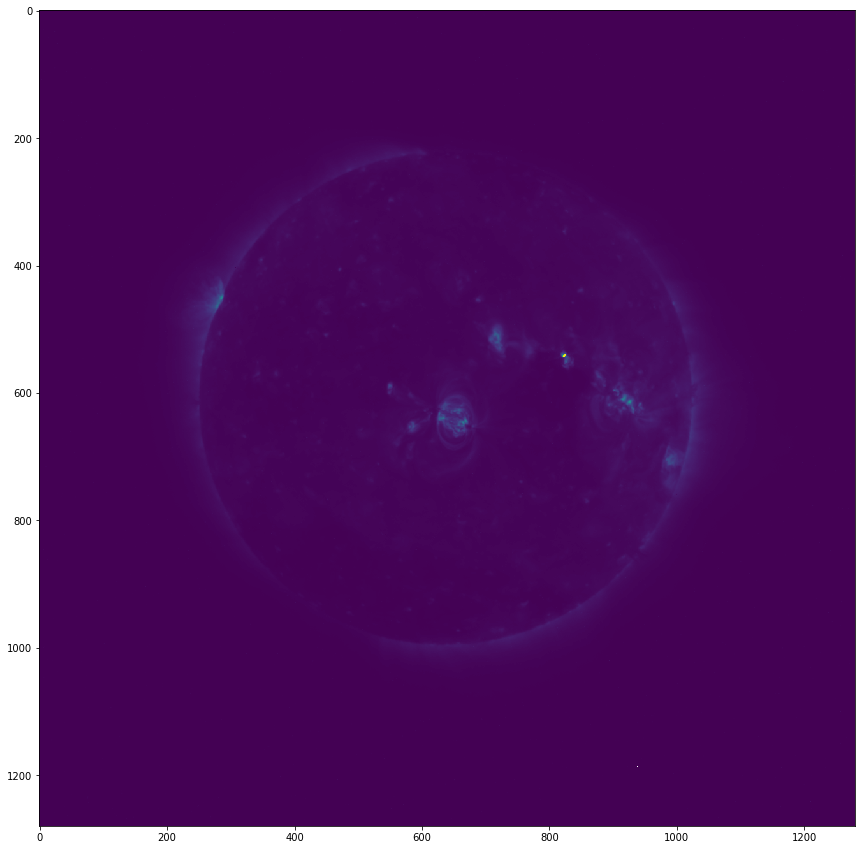

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(f[0].data)
plt.show()

In [4]:
NX, NY, NT = 5, 5, 5

In [5]:
hanning_window_2D = lambda x, y : np.power(np.sin((x + 0.5)*np.pi / NX), 2.0) * np.power(np.sin((y + 0.5) * np.pi / NY), 2.0)
hanning_window_3D = lambda x, y, t : np.power(np.sin((x + 0.5)*np.pi / NX), 2.0) * np.power(np.sin((y + 0.5) * np.pi / NY), 2.0) * np.power(np.sin((t + 0.5) * np.pi / NT), 2.0)

In [14]:
hanning_window_2D(5, 5)

0.009118627109394652

In [6]:
fft = np.fft.fft2

In [7]:
data = f[0].data

In [8]:
data[np.isnan(data)] = 0
data[np.isinf(data)] = 0

In [11]:
#data = np.sqrt(np.sqrt(data))

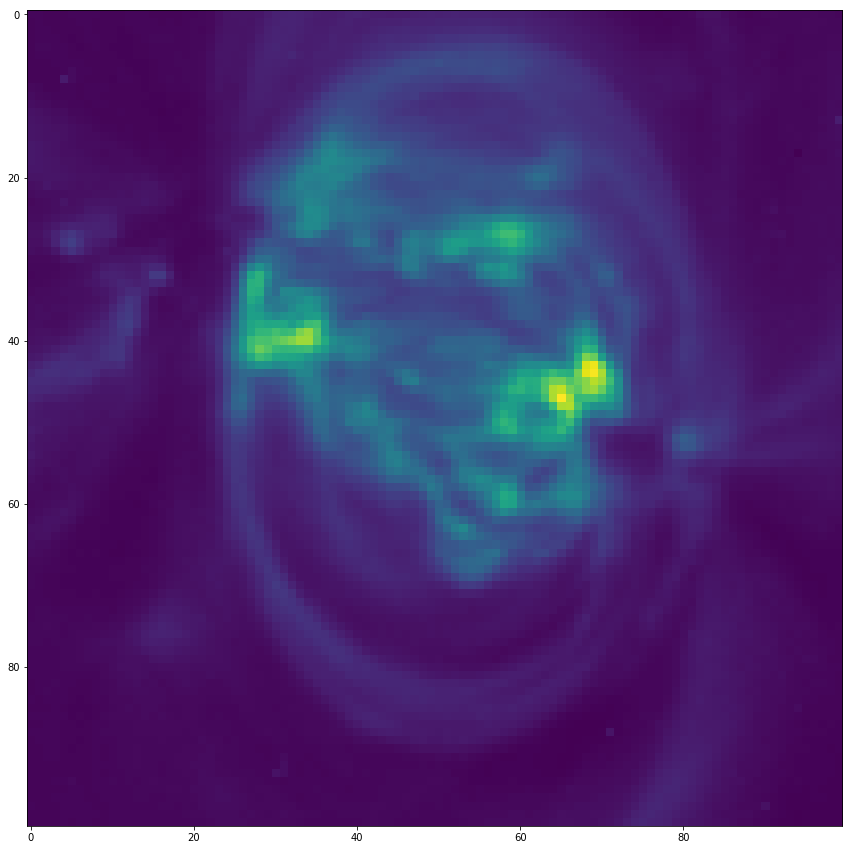

In [9]:
plt.figure(figsize=(15,15))
plt.imshow(data[600:700,600:700])
plt.show()

In [13]:
datalog = np.log(data)

/Users/mhughes/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [14]:
FS = fft(data)

In [15]:
FS[600:700,600:700]

array([[-11.58588989+10.46730966j,   0.01864395 +2.81853745j,
         10.12632886-12.22022429j, ...,   4.83487383 +9.94261413j,
          6.12363871 +7.86358649j,   4.47210151 +7.07679918j],
       [  1.36091587 +0.23184398j,   6.03858912 -2.43824808j,
         -6.81376281 -5.38784668j, ...,   1.99101866 -1.78764055j,
          1.05829988 +7.4477254j ,  -3.45579639 -2.43830924j],
       [ -1.65105359 -3.69196561j,  -0.84244400 +1.00729634j,
          1.28064709 +2.31124932j, ...,   2.25087868 -8.87418716j,
          7.54796295 -5.68442649j,   4.99433614-12.35058092j],
       ..., 
       [  3.01742292 -3.61125045j,   8.53976520 -2.95024959j,
         14.33274442 +3.12192508j, ...,   3.27879201 +9.09711709j,
         -5.67855834 -0.24961408j,   2.71343529 +3.57156482j],
       [  3.40061488 -7.80164488j, -10.09340320 +1.36675182j,
          1.84034629 +9.28451372j, ...,  -7.57847340 +7.44359288j,
          4.71221575 -5.19860155j,  -6.81899851 +3.26445591j],
       [  8.75972132 -1.681

In [16]:
FS = fft(data[600:700,600:700])

In [17]:
FS

array([[  1.08177375e+04  +0.j        ,  -9.12987220e+02 +99.70324528j,
         -8.09806232e+00 +38.63308294j, ...,
          1.51208629e+02 -10.45061439j,  -8.09806232e+00 -38.63308294j,
         -9.12987220e+02 -99.70324528j],
       [ -6.47063310e+02-524.4974287j ,   1.68896597e+02+183.49178916j,
          3.61207378e+01 +46.07374291j, ...,
         -5.57359916e+01-101.96354288j,   1.37454601e+01 -54.59782783j,
          2.38799457e+02+277.64328212j],
       [  3.87301250e+01  +9.26695634j,   5.32491810e+01+199.6458391j ,
         -2.98405252e+01 -90.08197355j, ...,
         -1.76841556e+01 -39.39550759j,   2.87042394e+01 -54.08163421j,
         -3.68575664e+01 +34.75124425j],
       ..., 
       [ -1.02616411e+02 +74.12928064j,   8.24148067e+01 -14.83691644j,
         -7.43827210e+01 -76.0939956j , ...,
         -2.51427953e+01 +18.31076202j,  -3.11353020e+01  -7.78219145j,
         -3.43483155e+01 +43.2866306j ],
       [  3.87301250e+01  -9.26695634j,  -3.68575664e+01 -34.751244

In [20]:
np.mgrid?

In [34]:
xstart, xend, xstep = 0, 10, 5
ystart, yend, ystep = 0, 10, 5
tstart, tend, tstep = 0, 10, 5
x = np.arange(xstart, xend, xstep)
y = np.arange(ystart, yend, ystep)
t = np.arange(tstart, tend, tstep)

In [36]:
mm = np.meshgrid(x, y, t)

In [38]:
mm[0]

array([[[0, 0],
        [5, 5]],

       [[0, 0],
        [5, 5]]])

In [39]:
mm[1]

array([[[0, 0],
        [0, 0]],

       [[5, 5],
        [5, 5]]])

# Start

In [37]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f = fits.open("/Users/mhughes/google_drive/codedungeon/sun_selector/data/thm_files/set_10/OR_SUVI-L1b-Fe195_G16_s20170911037044_e20170911037054_c20170911037188.fits")

In [38]:
fft = np.fft.fft2
ifft = np.fft.ifft2
data = f[0].data
data[np.isnan(data)] = 0
data[np.isinf(data)] = 0

In [39]:
xwidth, ywidth, twidth = 20, 20, 0

xstart, xend, xstep = xwidth*2, data.shape[0] - (xwidth*2), 5
ystart, yend, ystep = ywidth*2, data.shape[1] - (ywidth*2), 5
tstart, tend, tstep = 3, 4, 1
x_ = np.arange(xstart, xend, xstep)
y_ = np.arange(ystart, yend, ystep)
t_ = np.arange(tstart, tend, tstep)
#t_ = [0]
#x, y, t = np.meshgrid(x_, y_, t_, indexing='ij')

In [40]:
coords = []
for x in x_:
    for y in y_:
        for t in t_:
            coords.append((x,y,t))

In [41]:
image = np.dstack([data for i in range(15)])
image_sections = []
imbar_sections = []


In [42]:
NX, NY, NT = 2*xwidth+1, 2*ywidth+1, 2*twidth+1
hanning_window_2D = lambda x, y : np.power(np.sin((x + 0.5)*np.pi / NX), 2.0) * np.power(np.sin((y + 0.5) * np.pi / NY), 2.0)
hanning_window_3D = lambda x, y, t : np.power(np.sin((x + 0.5)*np.pi / NX), 2.0) * np.power(np.sin((y + 0.5) * np.pi / NY), 2.0) * np.power(np.sin((t + 0.5) * np.pi / NT), 2.0)

In [43]:
hanning = np.zeros((NX, NY, NT))
for x in range(hanning.shape[0]):
    for y in range(hanning.shape[1]):
        for t in range(hanning.shape[2]):
            hanning[x,y,t] = hanning_window_3D(x,y,t)

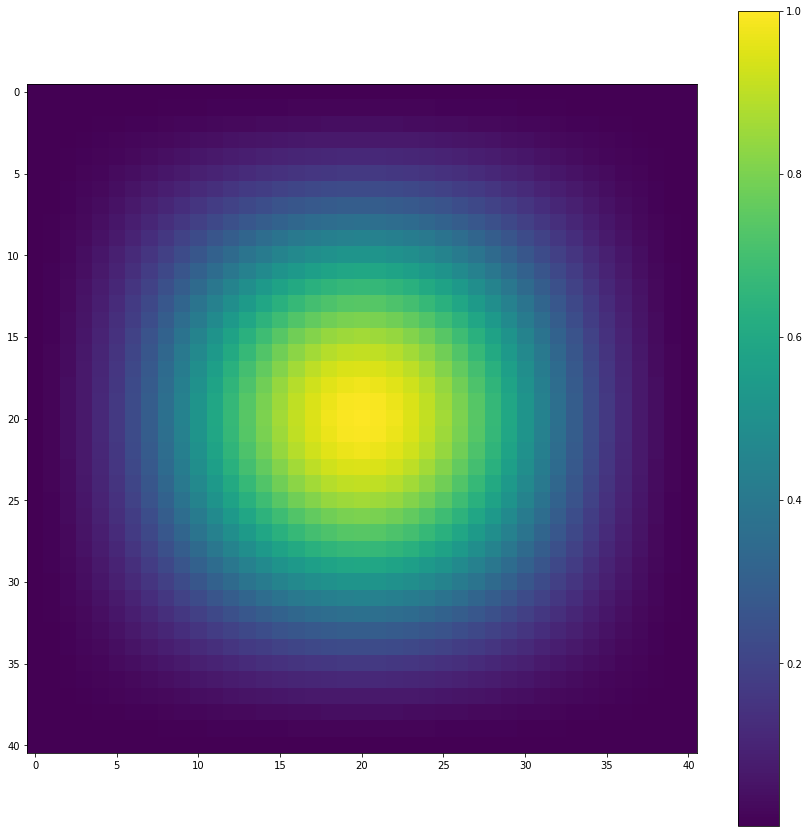

In [44]:
plt.figure(figsize=(15,15))
plt.imshow(hanning[:,:,0])
plt.colorbar()
plt.show()

In [45]:
for coord in coords:
    x, y, t = coord
    t = 1
    image_section = image[x-xwidth : x+xwidth + 1, 
                                y-ywidth : y+ywidth + 1, 
                                t-twidth : t+twidth + 1].copy()
    #image_section = signal.convolve(image_section, hanning, mode='same')
    image_section *= hanning
    image_sections.append(image_section)#, t-twidth//2])
    imbar_sections.append(np.sum(np.sqrt(image_section)))

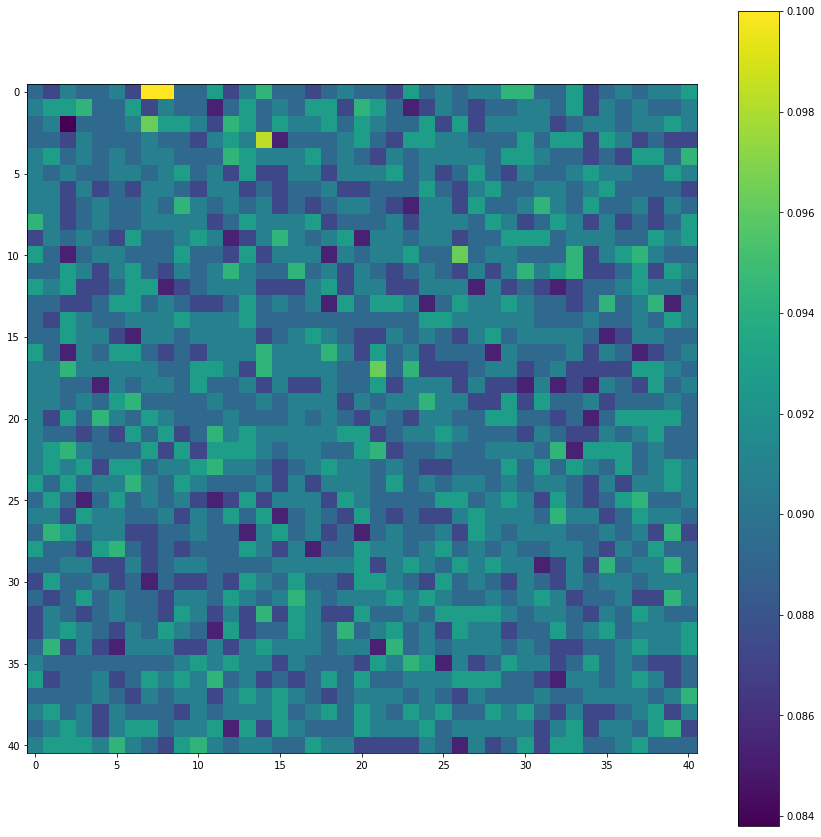

In [69]:
plt.figure(figsize=(15,15))
plt.imshow(image[x-xwidth : x+xwidth + 1, 
                                y-ywidth : y+ywidth + 1, 
                                t-twidth : t+twidth + 1][:,:,0], vmax = 0.1)
plt.colorbar()
plt.show()

In [72]:
section.shape

(41, 41)

In [73]:
hanning.shape

(41, 41, 1)

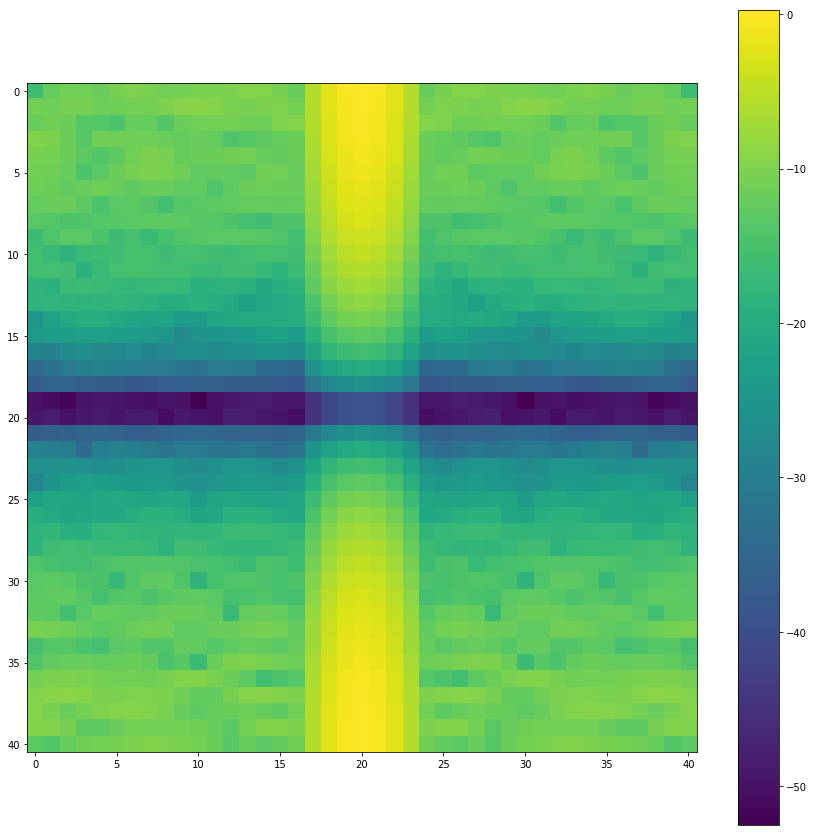

In [76]:
plt.figure(figsize=(15,15))
section = image[x-xwidth : x+xwidth + 1, 
                                y-ywidth : y+ywidth + 1, 
                                t-twidth : t+twidth + 1]
section *= hanning
trans = fft(section)
mag = np.log(np.abs(np.fft.fftshift(trans))**2)
plt.imshow(mag[:,:,0])
plt.colorbar()
plt.show()

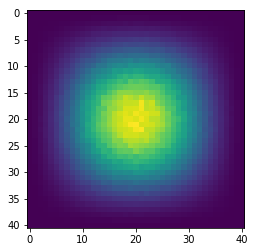

In [47]:

plt.imshow((image[x-xwidth : x+xwidth + 1, 
                                y-ywidth : y+ywidth + 1, 
                                t-twidth : t+twidth + 1] * hanning)[:,:,0])

In [49]:
image_fourier_sections = []
image_fourier_sections_magnitude = []
for section in image_sections:
    image_fourier = np.fft.fftshift(fft(section))
    image_fourier_sections.append(image_fourier)
    image_fourier_sections_magnitude.append(np.log(np.abs(image_fourier)**2))

In [50]:
beta_approx_fn = lambda kx, ky, omega: np.median([image_fourier_sections_magnitude[i][kx,ky,omega] / imbar_sections[i] for i in range(len(image_sections))])

In [51]:
beta_approx = np.zeros_like(image_sections[0])
for kx in range(beta_approx.shape[0]):
    for ky in range(beta_approx.shape[1]):
        for omega in range(beta_approx.shape[2]):
            beta_approx[kx,ky,omega] = beta_approx_fn(kx, ky, omega)

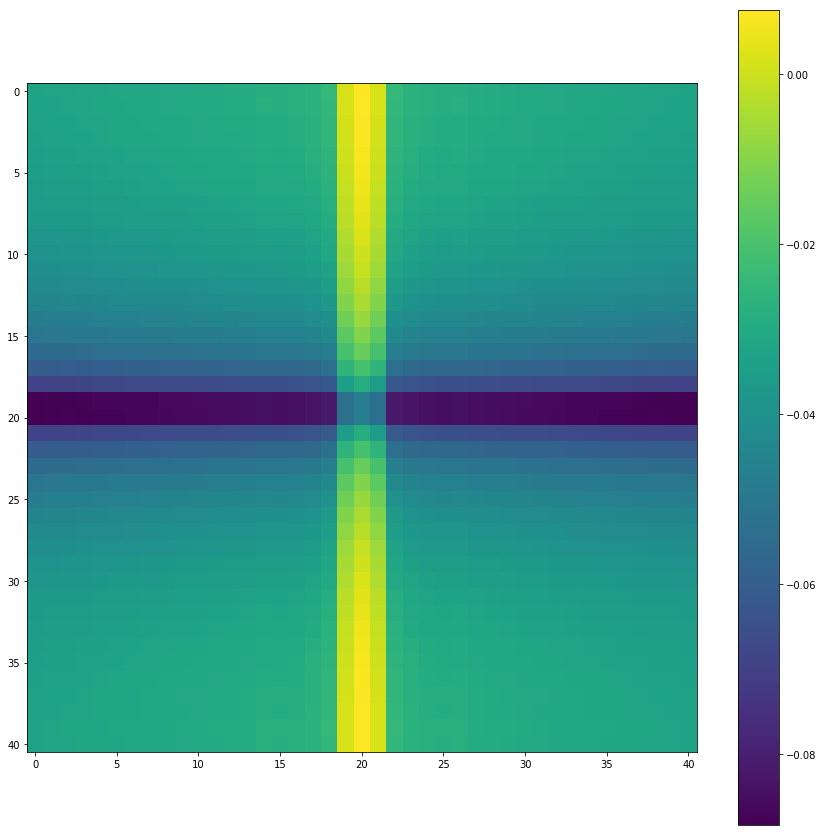

In [52]:
plt.figure(figsize=(15,15))
plt.imshow(beta_approx[:,:,0])
plt.colorbar()
plt.show()

In [53]:
noise_sections = [beta_approx * imbar_sections[i] for i in range(len(image_sections))]

In [54]:
threshold = [3 * noise_section for noise_section in noise_sections]

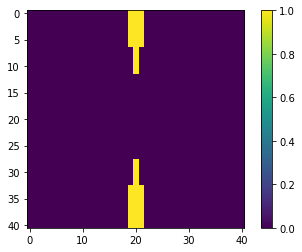

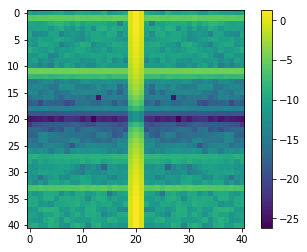

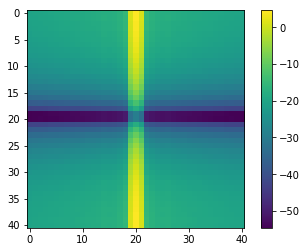

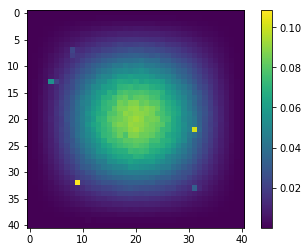

In [67]:
i = 0
plt.imshow((image_fourier_sections_magnitude[i] < threshold[i])[:,:,0])
plt.colorbar()
plt.show()
plt.imshow((image_fourier_sections_magnitude[i])[:,:,0])
plt.colorbar()
plt.show()
plt.imshow((threshold[i])[:,:,0])
plt.colorbar()
plt.show()
plt.imshow((image_sections[i])[:,:,0])
plt.colorbar()
plt.show()

In [56]:
gate_filter = [image_fourier_sections_magnitude[i] > threshold[i] for i in range(len(image_sections))]
#wiener_filter =  [(image_fourier_sections_magnitude[i]  / threshold[i]) / (1 + (image_fourier_sections_magnitude[i]  / threshold[i])) for i in range(len(image_sections))]

In [59]:
final_fourier_sections = [image_fourier_sections[i] * gate_filter[i] for i in range(len(image_sections))]
final_fourier_sections_shift = [np.fft.ifftshift(image_fourier_sections[i]) * gate_filter[i] for i in range(len(image_sections))]

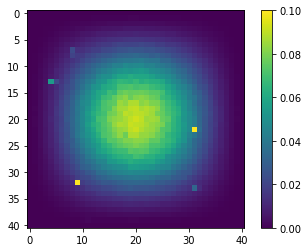

In [58]:
plt.imshow(image_sections[0][:,:,0], vmin=0, vmax=0.1)
plt.colorbar()

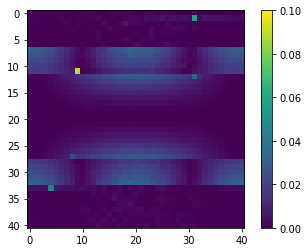

In [65]:
plt.imshow(np.abs(ifft(final_fourier_sections[0]))[:,:,0], vmin=0, vmax=0.1)
plt.colorbar()

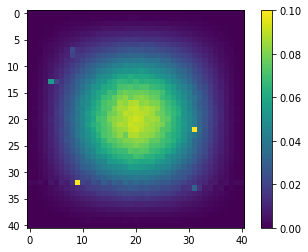

In [66]:
plt.imshow(np.abs(ifft(final_fourier_sections_shift[0]))[:,:,0], vmin=0, vmax=0.1)
plt.colorbar()

In [85]:
new_image = np.zeros_like(image)
for i in range(len(coords)):
    x, y, t = coords[i]
    new_image[x-xwidth : x+xwidth + 1, 
                y-ywidth : y+ywidth + 1, 
                t-twidth : t+twidth + 1] += np.abs(ifft(final_fourier_sections[i]))

In [60]:
new_image = np.zeros_like(image)
for i in range(len(coords)):
    x, y, t = coords[i]
    new_image[x-xwidth : x+xwidth + 1, 
                y-ywidth : y+ywidth + 1, 
                t-twidth : t+twidth + 1] += hanning * np.abs(ifft(final_fourier_sections[i]))

In [62]:
new_image_shift = np.zeros_like(image)
for i in range(len(coords)):
    x, y, t = coords[i]
    new_image[x-xwidth : x+xwidth + 1, 
                y-ywidth : y+ywidth + 1, 
                t-twidth : t+twidth + 1] += hanning * np.abs(ifft(final_fourier_sections_shift[i]))

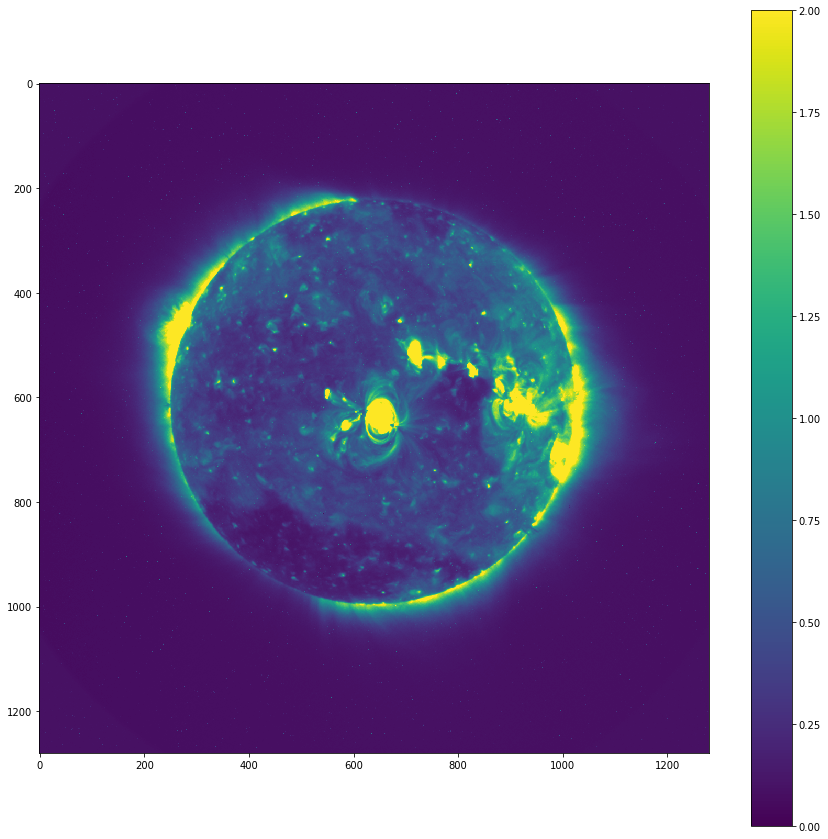

In [112]:
plt.figure(figsize=(15,15))
plt.imshow(image[:,:,3], vmax=2)
plt.colorbar()
plt.show()

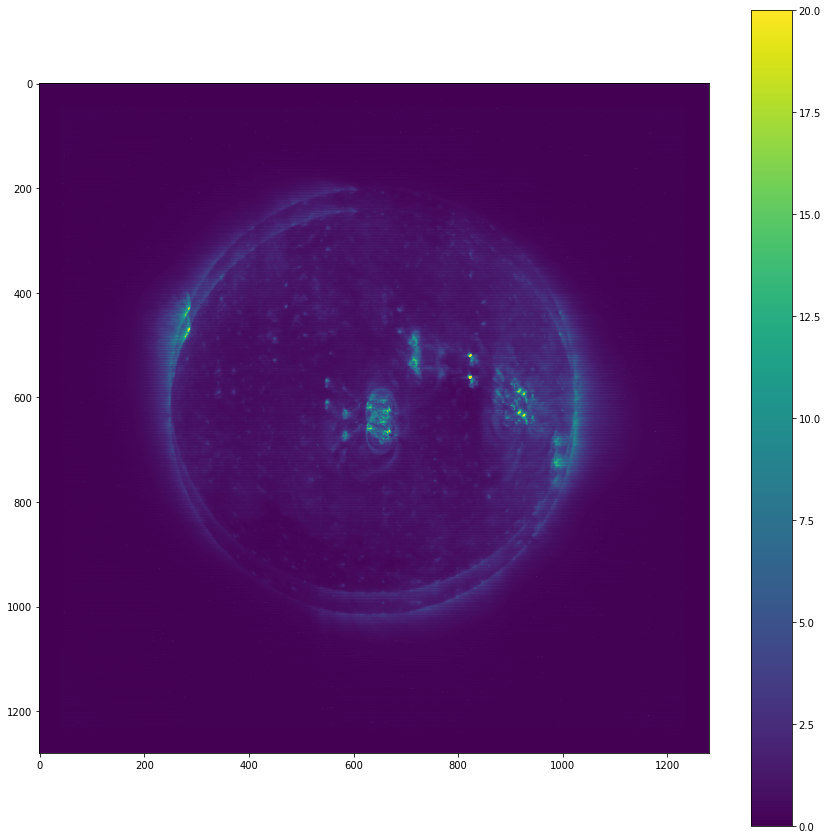

In [61]:
plt.figure(figsize=(15,15))
plt.imshow(new_image[:,:,3], vmax=20)
plt.colorbar()
plt.show()

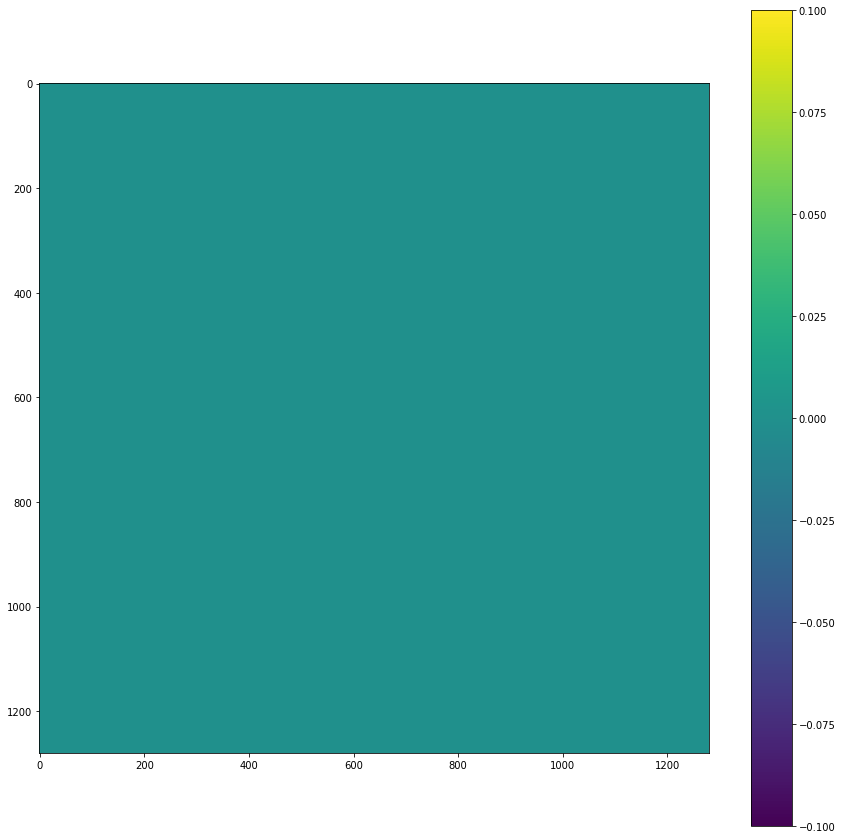

In [64]:
plt.figure(figsize=(15,15))
plt.imshow(new_image_shift[:,:,3])
plt.colorbar()
plt.show()

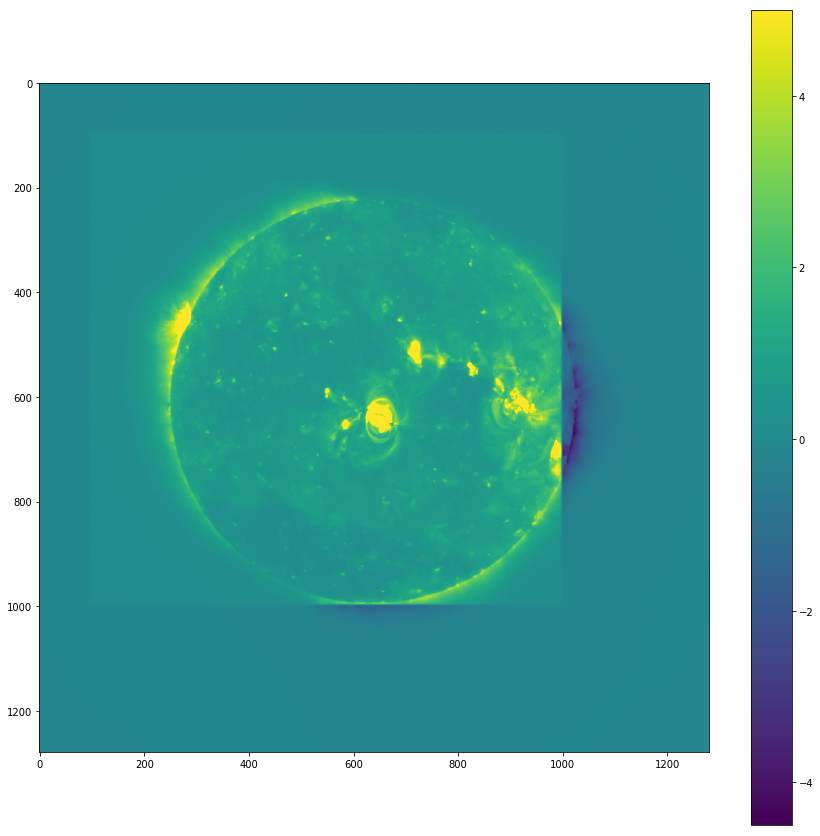

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(new_image[:,:,3] - image[:,:,3], vmax=5)
plt.colorbar()
plt.show()

In [29]:
beta_approx_fn(0,0,0)

-0.14749568293261797

In [211]:
Imbar = np.sum([np.sum(np.sqrt(image_sections[i])) for i in range(len(image_sections))])

In [212]:
Imbar

1.6567491e+08

In [201]:
Imbar = np.sum([np.sqrt(image_sections[i][kx, ky, omega]) for i in range(len(image_sections))])

In [202]:
Imbar

195856.59

In [213]:
bapprox = np.median([np.abs(image_fourier_sections_magnitude[i][kx, ky, omega]) / Imbar])

In [214]:
bapprox

4.3546897579598281e-07

In [ ]:
bapprox * 

In [190]:
98.9 * 10**-6 * 226800

22.43052

In [171]:
x

995

In [172]:
x-xwidth

989

In [174]:
x+xwidth + 1

1002

In [182]:
image.shape

(1280, 1280, 15)

In [175]:
image[989:1002, :, :]

array([], shape=(0, 1280, 1280), dtype=float32)

In [185]:
image[x-xwidth : x+xwidth + 1, 
    y-ywidth : y+ywidth + 1, 
    t-twidth : t+twidth + 1]

array([[[ 0.55425757,  0.55425757,  0.55425757,  0.55425757,  0.55425757],
        [ 0.56917208,  0.56917208,  0.56917208,  0.56917208,  0.56917208],
        [ 0.56292552,  0.56292552,  0.56292552,  0.56292552,  0.56292552],
        [ 0.55719155,  0.55719155,  0.55719155,  0.55719155,  0.55719155],
        [ 0.55646241,  0.55646241,  0.55646241,  0.55646241,  0.55646241],
        [ 0.56007987,  0.56007987,  0.56007987,  0.56007987,  0.56007987],
        [ 0.55791783,  0.55791783,  0.55791783,  0.55791783,  0.55791783],
        [ 0.55936199,  0.55936199,  0.55936199,  0.55936199,  0.55936199],
        [ 0.55791783,  0.55791783,  0.55791783,  0.55791783,  0.55791783],
        [ 0.55719155,  0.55719155,  0.55719155,  0.55719155,  0.55719155],
        [ 0.55646241,  0.55646241,  0.55646241,  0.55646241,  0.55646241],
        [ 0.55127627,  0.55127627,  0.55127627,  0.55127627,  0.55127627],
        [ 0.55791783,  0.55791783,  0.55791783,  0.55791783,  0.55791783]],

       [[ 0.56007987,  

In [168]:
image_sections[4]

array([], shape=(0, 13, 5), dtype=float32)

In [146]:
kkk = [section.shape[0] for section in image_sections]

In [149]:
np.max(kkk)

11

In [143]:
i = 500
image_sections[i].shape

(0, 13, 0)

In [ ]:
[]

In [142]:
image_sections[655360 // 4].shape

(0, 0, 0)

In [139]:
image_sections[-1]

array([], shape=(0, 11, 13), dtype=float32)

In [117]:
image[x-xwidth//2:x+xwidth//2, 
                                y-ywidth//2:y+ywidth//2, 
                                t-twidth//2:t+twidth//2]

array([[[ 0.55425757,  0.54671007],
        [ 0.54360217,  0.5490067 ]],

       [[ 0.55425757,  0.54671007],
        [ 0.54360217,  0.5490067 ]]], dtype=float32)

In [105]:
image_sections[0]

array([], shape=(0, 0, 0), dtype=float32)

In [48]:
for xx, yy, zz in (x, y, z):
    print("entry", xx, yy, zz)

entry [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] [[ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.11111111  1.11111111  1.11111111  1.11111111  1.11111111  1.11111111
   1.11111111  1.11111111  1.11111111  1.11111111]
 [ 1.22222222  1.22222222  1.22222222  1.22222222  1.22222222  1.22222222
   1.22222222  1.22222222  1.22222222  1.22222222]
 [ 1.33333333  1.33333333  1.33333333  1.33333333  1.33333333  1.33333333
   1.33333333  1.33333333  1.33333333  1.33333333]
 [ 1.44444444  1.44444444  1.44444444  1.44444444  1.44444444  1.444444

In [46]:
z.shape

(10, 10, 10)

In [69]:
FS

array([[  1.08177375e+04  +0.j        ,  -9.12987220e+02 +99.70324528j,
         -8.09806232e+00 +38.63308294j, ...,
          1.51208629e+02 -10.45061439j,  -8.09806232e+00 -38.63308294j,
         -9.12987220e+02 -99.70324528j],
       [ -6.47063310e+02-524.4974287j ,   1.68896597e+02+183.49178916j,
          3.61207378e+01 +46.07374291j, ...,
         -5.57359916e+01-101.96354288j,   1.37454601e+01 -54.59782783j,
          2.38799457e+02+277.64328212j],
       [  3.87301250e+01  +9.26695634j,   5.32491810e+01+199.6458391j ,
         -2.98405252e+01 -90.08197355j, ...,
         -1.76841556e+01 -39.39550759j,   2.87042394e+01 -54.08163421j,
         -3.68575664e+01 +34.75124425j],
       ..., 
       [ -1.02616411e+02 +74.12928064j,   8.24148067e+01 -14.83691644j,
         -7.43827210e+01 -76.0939956j , ...,
         -2.51427953e+01 +18.31076202j,  -3.11353020e+01  -7.78219145j,
         -3.43483155e+01 +43.2866306j ],
       [  3.87301250e+01  -9.26695634j,  -3.68575664e+01 -34.751244

In [75]:
np.fft.ifft2(FS)

array([[ 0.54671007 -2.02496617e-17j,  0.54900670 -1.99360208e-17j,
         0.54900670 -7.43985844e-18j, ...,  0.55719155 -3.54043028e-17j,
         0.54671007 -3.66494666e-17j,  0.54671007 +1.67688171e-17j],
       [ 0.55202615 -9.90040987e-18j,  0.54900670 -2.21347828e-17j,
         0.54671007 -5.58115262e-18j, ...,  0.54671007 -2.13053021e-17j,
         0.54360217 -2.38914409e-17j,  0.55202615 +1.61760379e-17j],
       [ 0.55202615 +1.04766104e-17j,  0.54671007 +9.82495346e-18j,
         0.55425757 +1.30858890e-17j, ...,  0.54044008 -9.74986852e-18j,
         0.55202615 -1.59553753e-17j,  0.55202615 +1.79142805e-17j],
       ..., 
       [ 0.54671007 -2.02859573e-17j,  0.54900670 -1.64943652e-17j,
         0.54900670 -1.71389300e-17j, ...,  0.54671007 -1.14389369e-17j,
         0.54671007 -2.33076467e-17j,  0.54671007 +1.83933051e-17j],
       [ 0.54044008 +1.54794489e-18j,  0.54044008 +3.32931397e-18j,
         0.54900670 +2.16845163e-18j, ...,  0.54360217 +3.79577763e-19j,
      

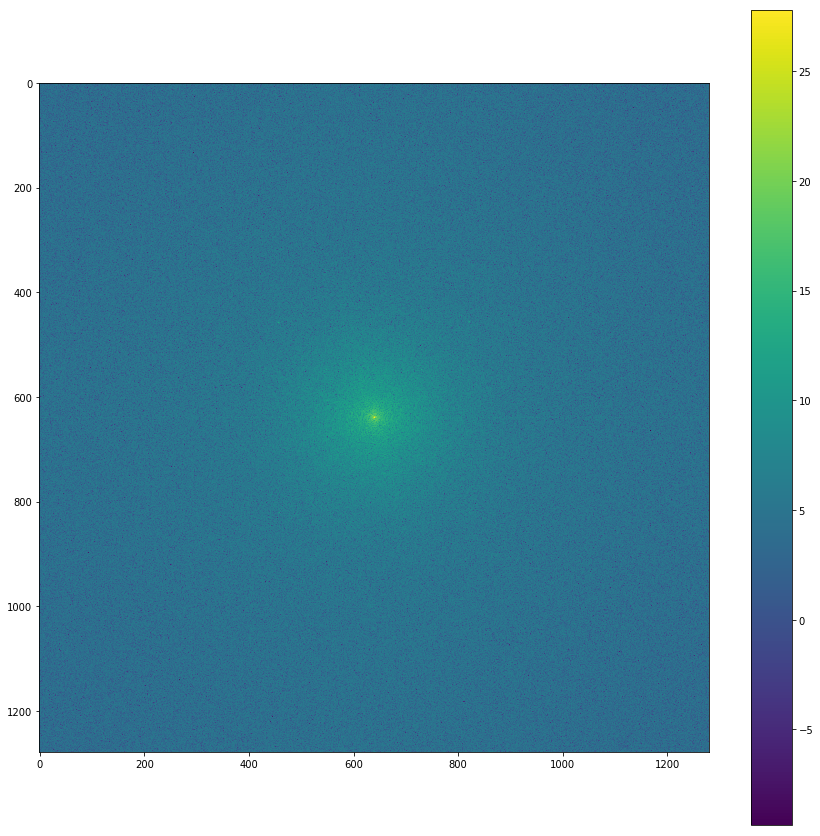

In [73]:
plt.figure(figsize=(15,15))
plt.imshow(np.log(np.abs(np.fft.fftshift(FS))**2))
plt.colorbar()
plt.show()

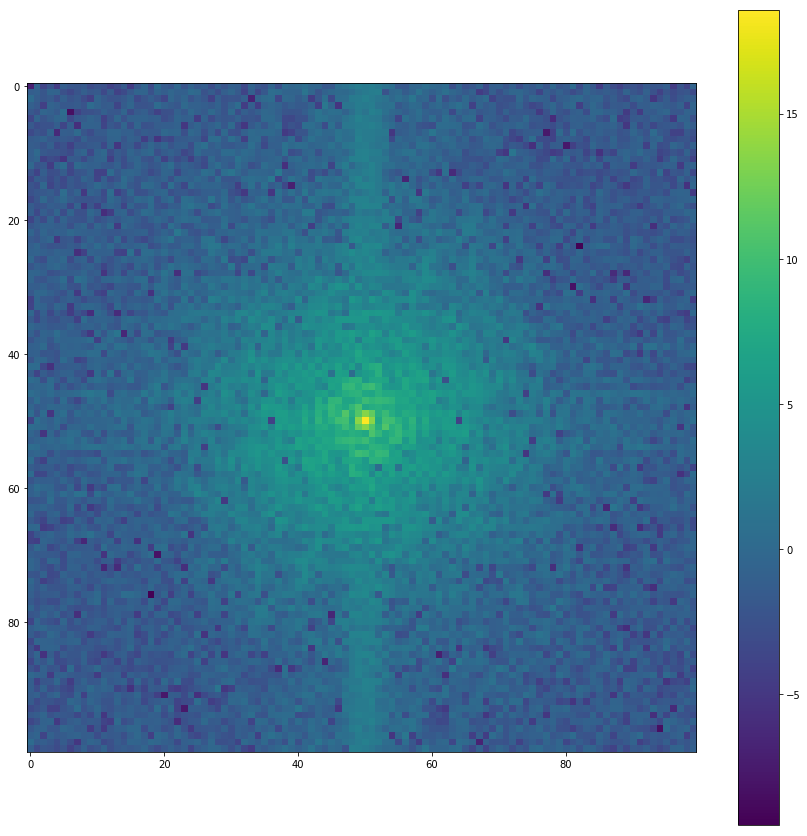

In [71]:
plt.figure(figsize=(15,15))
plt.imshow(np.log(np.abs(np.fft.fftshift(FS))**2))
plt.colorbar()
plt.show()

In [78]:
img

In [149]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('/Users/mhughes/Desktop/aef1a1d2205541429173e8ceacc8a263.jpeg',0)
f = fits.open("/Users/mhughes/google_drive/codedungeon/sun_selector/data/thm_files/set_10/OR_SUVI-L1b-Fe195_G16_s20170911037044_e20170911037054_c20170911037188.fits")
data = f[0].data
data[np.isnan(data)] = 0
data[np.isinf(data)] = 0
img = np.power(data, 0.1)

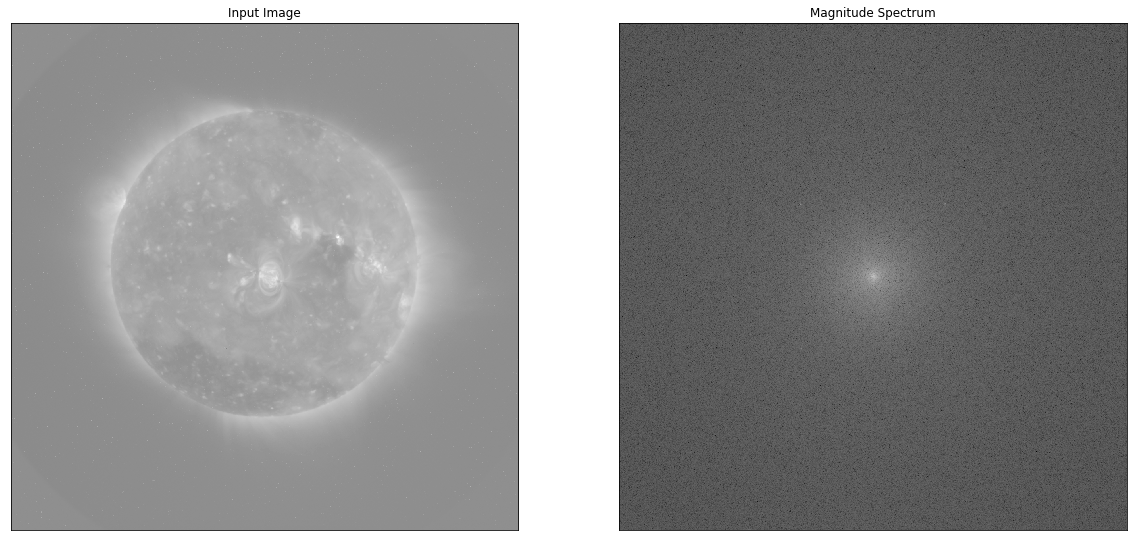

In [158]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()


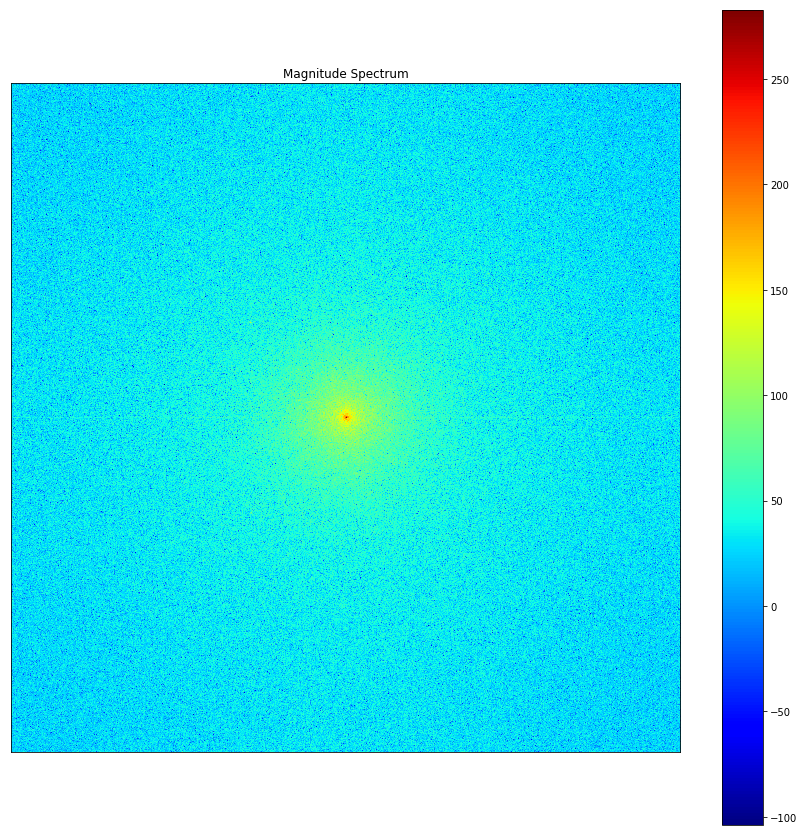

In [159]:
plt.figure(figsize=(15,15))
plt.imshow(magnitude_spectrum, cmap = 'jet')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

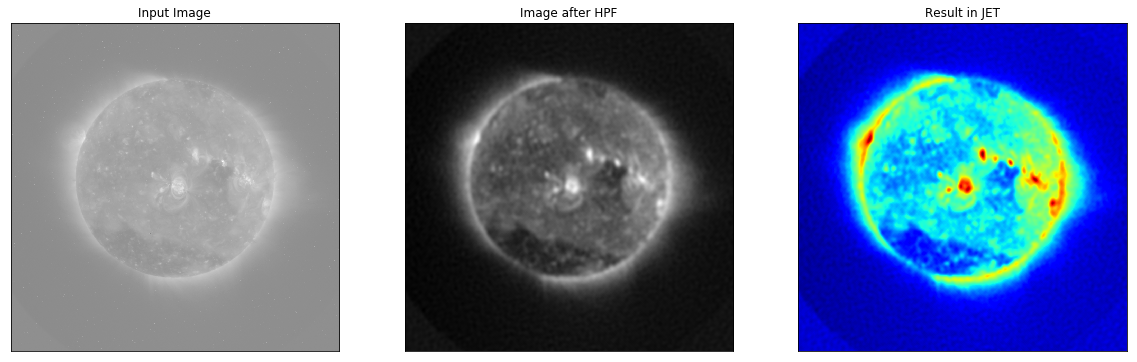

In [164]:
#rows, cols = img.shape
#crow,ccol = int(rows/2) , int(cols/2)
#fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
fshift[magnitude_spectrum < 100] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.figure(figsize=(20,20))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img_back, cmap='jet')
plt.title('Result in JET')
plt.xticks([])
plt.yticks([])

plt.show()

In [167]:
N = 12

In [168]:
x, y = 600, 600

In [170]:
subimg = img[x-N//2:x+N//2, y-N//2:y+N//2]

In [220]:
subimgs = []

In [221]:
subimgs.append(img[10:15,10:15])

In [222]:
subimgs

[array([[ 0.78846765,  0.78363258,  0.78974098,  0.78846765,  0.78673971],
        [ 0.78542161,  0.78673971,  0.78363258,  0.78846765,  0.78673971],
        [ 0.78673971,  0.78542161,  0.78673971,  0.78673971,  0.78846765],
        [ 0.78673971,  0.78673971,  0.78542161,  0.78542161,  0.78846765],
        [ 0.78542161,  0.78673971,  0.78542161,  0.78542161,  0.78542161]], dtype=float32)]

In [241]:
0 - N//2, 0 + N//2

(-6, 6)

In [245]:
subimgs = list()
for x in range(N//2,1280-N//2,3):
    for y in range(N//2,1280-N//2,3):
        subimg = img[x-N//2:x+N//2, y-N//2:y+N//2]
        subimgs.append(subimg)

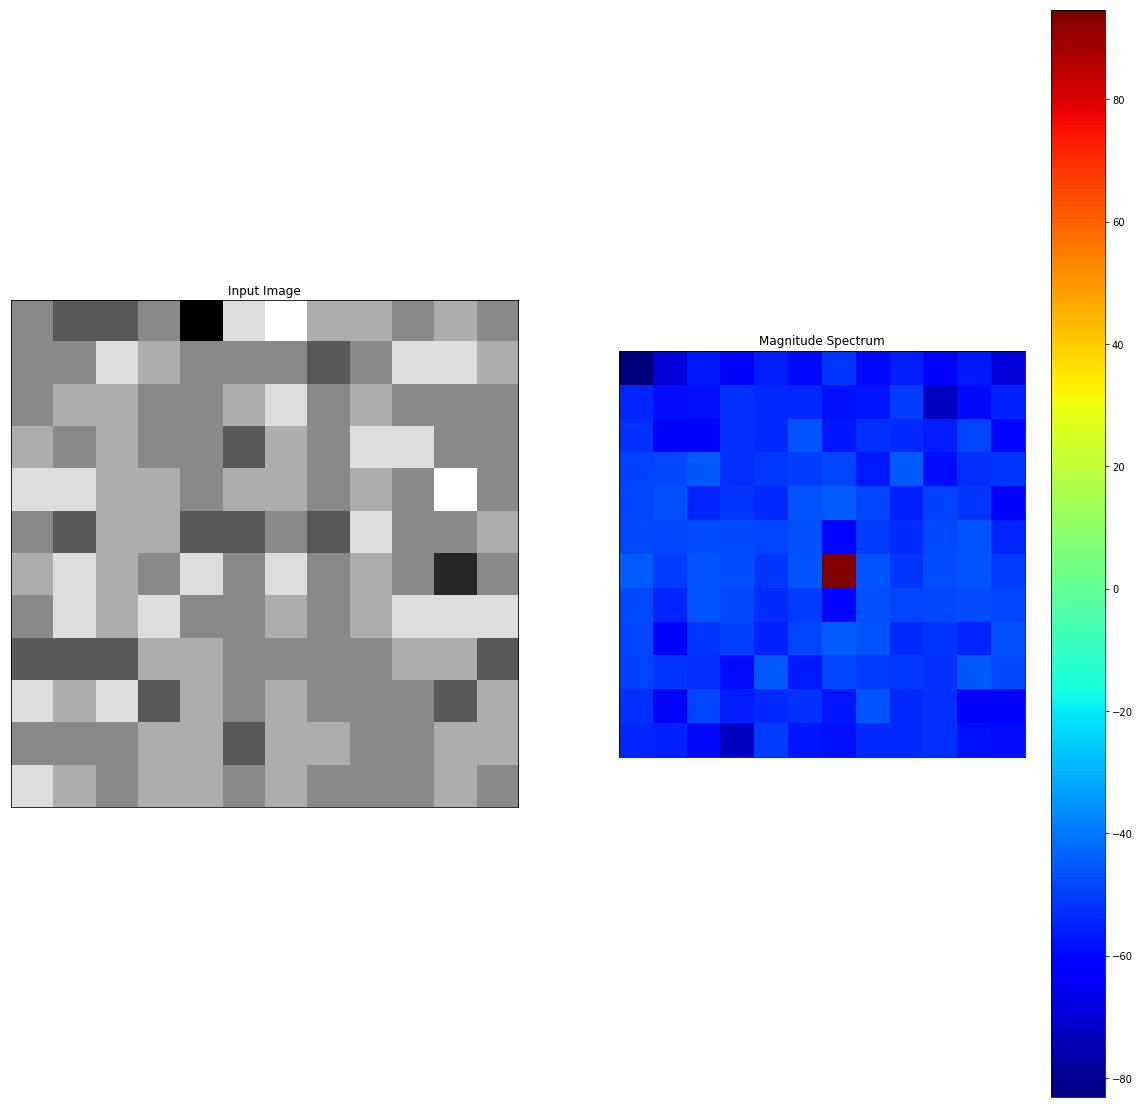

In [247]:
f = np.fft.fft2(subimgs[0])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(subimg, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'jet')
plt.colorbar()
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()


In [249]:
subimgs_f = []
for subimg in subimgs:
    f = np.fft.fft2(subimg)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    subimgs_f.append(magnitude_spectrum)

In [253]:
noise = lambda x,y : np.median([subimg[x,y] for subimg in subimgs_f])
threshhold = lambda x, y : 3 * noise(x,y)

In [256]:
filterfn = lambda subimg_f, x,y: 0 if subimg_f[x,y] < threshhold(x,y) else 1

In [257]:
filterfn(subimgs_f[0], 0, 0)

1

In [258]:
def filtered_img(subimg_f):
    for x in range(subimg_f.shape[0]):
        for y in range(subimg_f.shape[1]):
            subimg_f[x,y] = subimg_f[x,y] * filterfn(subimg_f,x,y)
    return 

In [260]:
subimgs_f[1]

array([[-71.33683843, -55.48803323, -44.20307714, -41.7640681 ,
        -38.0713217 , -38.79072983, -34.79309175, -38.79072983,
        -38.0713217 , -41.7640681 , -44.20307714, -55.48803323],
       [-79.91708484, -56.77129524, -47.95703701, -42.33311035,
        -38.82205268, -38.01405702, -37.42219148, -35.9878503 ,
        -39.88290389, -44.40608253, -48.30215899, -79.38855691],
       [-66.2709939 , -58.69356022, -52.22869253, -42.33929517,
        -38.53176956, -37.58740821, -35.04176051, -40.30319335,
        -39.36228279, -45.6016304 , -53.76780706, -65.29085816],
       [-66.14351074, -57.11119034, -47.78310164, -44.90298456,
        -38.90452878, -37.41682376, -36.20493977, -40.21616378,
        -36.37708806, -51.03259294, -47.82778995, -59.77926717],
       [-58.59163667, -71.52915404, -46.67288309, -41.68612331,
        -36.87386713, -37.02274758, -39.55609312, -35.77728704,
        -38.44448146, -45.6789863 , -50.86485517, -55.10996651],
       [-71.18294395, -52.74900276,

In [261]:
filtered_img(subimgs_f[1])

In [262]:
subimgs_f[1]

array([[-71.33683843, -55.48803323, -44.20307714, -41.7640681 ,
        -38.0713217 , -38.79072983, -34.79309175, -38.79072983,
        -38.0713217 , -41.7640681 , -44.20307714, -55.48803323],
       [-79.91708484, -56.77129524, -47.95703701, -42.33311035,
        -38.82205268, -38.01405702, -37.42219148, -35.9878503 ,
        -39.88290389, -44.40608253, -48.30215899, -79.38855691],
       [-66.2709939 , -58.69356022, -52.22869253, -42.33929517,
        -38.53176956, -37.58740821, -35.04176051, -40.30319335,
        -39.36228279, -45.6016304 , -53.76780706, -65.29085816],
       [-66.14351074, -57.11119034, -47.78310164, -44.90298456,
        -38.90452878, -37.41682376, -36.20493977, -40.21616378,
        -36.37708806, -51.03259294, -47.82778995, -59.77926717],
       [-58.59163667, -71.52915404, -46.67288309, -41.68612331,
        -36.87386713, -37.02274758, -39.55609312, -35.77728704,
        -38.44448146, -45.6789863 , -50.86485517, -55.10996651],
       [-71.18294395, -52.74900276,

In [255]:
threshhold(5,5)

-154.78389030111879

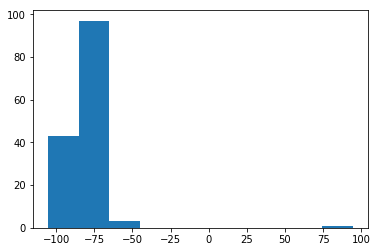

In [238]:
plt.hist(magnitude_spectrum.ravel())
plt.show()

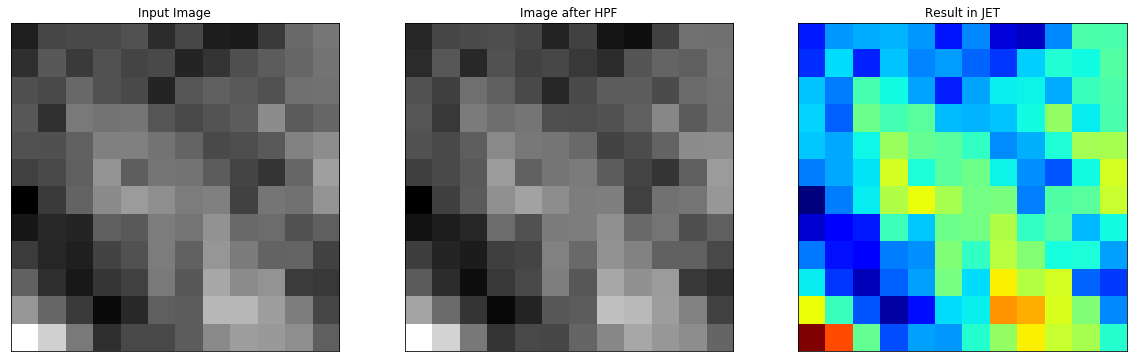

In [188]:
#rows, cols = img.shape
#crow,ccol = int(rows/2) , int(cols/2)
#fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
fshift[magnitude_spectrum < -75] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.figure(figsize=(20,20))

plt.subplot(131),plt.imshow(subimg, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img_back, cmap='jet')
plt.title('Result in JET')
plt.xticks([])
plt.yticks([])

plt.show()

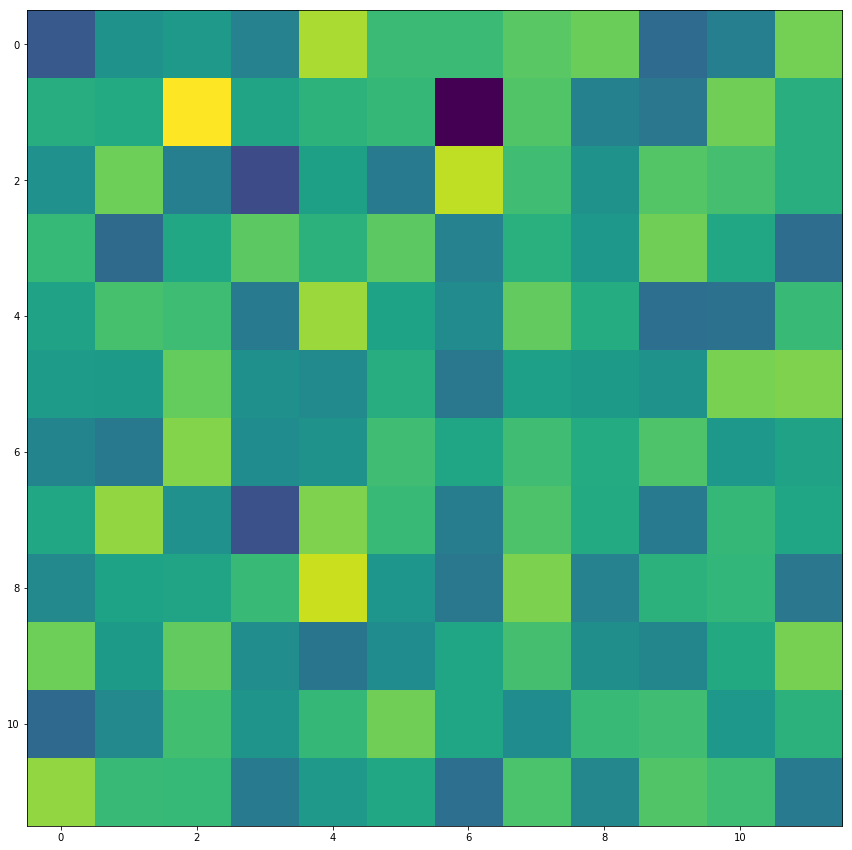

In [190]:
plt.figure(figsize=(15,15))
plt.imshow(subimg - img_back)
plt.show()